In [1]:
include("../src/Autoencoder.jl")
using Flux.Data.MNIST
using Base.Iterators: partition
using Juno: @progress

In [2]:
#Data and parameters preparation
imgs = MNIST.images();

# Partition into batches of size 1000
data = [float(hcat(vec.(imgs)...)) for imgs in partition(imgs, 1000)];
N = 32; # Size of the encoding

In [7]:
autoencoder = AutoEncoder(28^2,N)
train(autoencoder,data)

┌ Info: Epoch 1
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.10313684631309276 (tracked)
loss(data[1]) = 0.07294243287252422 (tracked)
loss(data[1]) = 0.06621174088133115 (tracked)


┌ Info: Epoch 2
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.059633957738267726 (tracked)
loss(data[1]) = 0.05142775551924206 (tracked)
loss(data[1]) = 0.043816158435954 (tracked)


┌ Info: Epoch 3
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.03923486703793152 (tracked)
loss(data[1]) = 0.035656233817348254 (tracked)


┌ Info: Epoch 4
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.032551515536099244 (tracked)
loss(data[1]) = 0.029964364929313047 (tracked)
loss(data[1]) = 0.028341820385838625 (tracked)


┌ Info: Epoch 5
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.026808811673916643 (tracked)
loss(data[1]) = 0.025474585254747432 (tracked)
loss(data[1]) = 0.024307805378385363 (tracked)


┌ Info: Epoch 6
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.02329357063576651 (tracked)
loss(data[1]) = 0.022532977418041437 (tracked)


┌ Info: Epoch 7
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.021646865159565765 (tracked)
loss(data[1]) = 0.021059107794255277 (tracked)
loss(data[1]) = 0.02051149296260519 (tracked)


┌ Info: Epoch 8
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.019998766099345314 (tracked)
loss(data[1]) = 0.0194189414630314 (tracked)
loss(data[1]) = 0.018974996059593793 (tracked)


┌ Info: Epoch 9
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.01859128392076443 (tracked)
loss(data[1]) = 0.018363550920462286 (tracked)


┌ Info: Epoch 10
└ @ Main /home/jrun/.julia/packages/Flux/oN61x/src/optimise/train.jl:93


loss(data[1]) = 0.017934243117716787 (tracked)
loss(data[1]) = 0.017619501062697673 (tracked)
loss(data[1]) = 0.01741965952835621 (tracked)


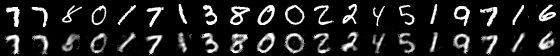

In [8]:
# Sample output
using Images

img(x::Vector) = Gray.(reshape(clamp.(x, 0, 1), 28, 28))

function sample()
  # 20 random digits
  before = [imgs[i] for i in rand(1:length(imgs), 20)]
  # Before and after images
  after = img.(map(x -> cpu(autoencoder._model)(float(vec(x))).data, before))
  # Stack them all together
  hcat(vcat.(before, after)...)
end


sample()